In [9]:
# Country code to name
country_map = {
    'EU27_2020': 'European Union (27)',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'DE': 'Germany',
    'EE': 'Estonia',
    'IE': 'Ireland',
    'EL': 'Greece',
    'ES': 'Spain',
    'FR': 'France',
    'HR': 'Croatia',
    'IT': 'Italy',
    'CY': 'Cyprus',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'HU': 'Hungary',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'AT': 'Austria',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'FI': 'Finland',
    'SE': 'Sweden'
}


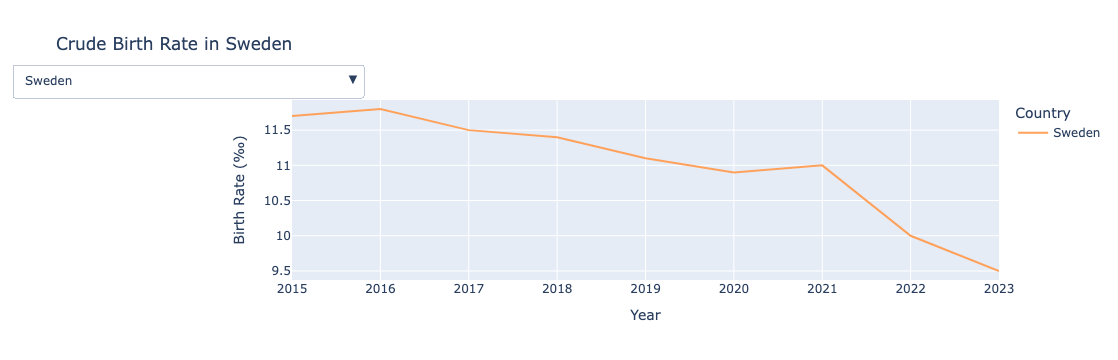

In [10]:
import pandas as pd
import plotly.express as px

# Load 
df = pd.read_csv("formatted_birth_data.csv")
df["country_name"] = df["country"].map(country_map)
df = df[df["birth_rate_per_thousand"].notna()]

# Sort 
base_countries = sorted([c for c in df["country_name"].unique() if "European Union" not in c])
base_countries.append("European Union (27, population-weighted average)")
dropdown_countries = ["All Countries"] + base_countries

# Plot
fig = px.line(
    df,
    x="year",
    y="birth_rate_per_thousand",
    color="country_name",
    title="Crude Birth Rate Over Time (per 1000 people)",
    labels={
        "year": "Year",
        "birth_rate_per_thousand": "Birth Rate (‰)",
        "country_name": "Country"
    }
)

trace_names = [trace.name for trace in fig.data]

visibility_maps = []
for country in dropdown_countries:
    visibility = [(name == country or country == "All Countries") for name in trace_names]
    visibility_maps.append(visibility)

# Dropdown
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": country,
                    "method": "update",
                    "args": [
                        {"visible": visibility_maps[i]},
                        {"title": f"Crude Birth Rate in {country}"}
                    ]
                }
                for i, country in enumerate(dropdown_countries)
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.1,
            "y": 1.2
        }
    ]
)

fig.show()
fig.save

